In [1]:
# importing importat libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Importing the machine learning Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder,power_transform,StandardScaler,MinMaxScaler

In [2]:
df=pd.read_csv("Web_Scraped_flight.csv",index_col=0)
df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,price
0,IndiGo\n6E-137/2046,Jammu,Mumbai,11:55,19:25,7h 30m,2 Stop(s),"7,365"
1,IndiGo\n6E-137/5041,Jammu,Mumbai,11:55,20:50,8h 55m,2 Stop(s),"7,365"
2,IndiGo\n6E-609/6722,Jammu,Mumbai,14:00,23:30,9h 30m,2 Stop(s),"7,365"
3,IndiGo\n6E-137/6722,Jammu,Mumbai,11:55,23:30,11h 35m,2 Stop(s),"7,365"
4,SpiceJet\nSG-160/945,Jammu,Mumbai,11:15,16:15,5h 00m,1 Stop,"7,418"
...,...,...,...,...,...,...,...,...
1095,Vistara\nUK-998/747,Pune,Kolkata,16:55,08:35\n+ 1 day,15h 40m,1 Stop,"10,209"
1096,Vistara\nUK-998/705,Pune,Kolkata,16:55,09:35\n+ 1 day,16h 40m,1 Stop,"10,209"
1097,Vistara\nUK-998/737,Pune,Kolkata,16:55,18:05\n+ 1 day,25h 10m,1 Stop,"10,209"
1098,Vistara\nUK-998/707,Pune,Kolkata,16:55,19:35\n+ 1 day,26h 40m,1 Stop,"10,388"


In [3]:
df.isnull().sum()

Airline         0
Source          0
Destination     0
Dep_Time        0
Arrival_Time    0
Duration        0
Total_Stops     0
price           0
dtype: int64

#### There is no missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6730 entries, 0 to 1099
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       6730 non-null   object
 1   Source        6730 non-null   object
 2   Destination   6730 non-null   object
 3   Dep_Time      6730 non-null   object
 4   Arrival_Time  6730 non-null   object
 5   Duration      6730 non-null   object
 6   Total_Stops   6730 non-null   object
 7   price         6730 non-null   object
dtypes: object(8)
memory usage: 473.2+ KB


**We have only one column that is numeric that is target column**

### Preprocessing
**1-Doing feature engineering**

**2-Filling missing values**

**3-Droping some columns**

Dropping Route it is not important because we just want to predict the price so basically we need Source and destination and also Droping additional info because it is not important for fligh fare prediction and also dropping Date of journey because i have converted that into years,month,day and also dropping duration because if we have Dep_time and Arrival_time we dont need it because it just represent the difference between these two only

In [5]:
df['price']=df['price'].replace(",","",regex=True)
#converting object data to int data by removing comma.

In [6]:
df['price']=df['price'].astype('int64')

In [7]:
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_minute']=pd.to_datetime(df['Dep_Time']).dt.minute
df=df.drop(['Dep_Time'],axis=1)
# creating additional columns for spliting Dep_time column

In [8]:
df['Arrival_Time']=df['Arrival_Time'].replace("\n+","",regex=True)

In [9]:
# treating the date column
df.Arrival_Time=df.Arrival_Time.str.split(':')

In [10]:
#Arrival_Hour=[]
airlines=[]
for i in df['Airline']:
    #j=i[0]
    k=i.split()[0]
    airlines.append(k)
    

df['Airlines']=airlines

In [11]:
df['Arrival_Hour']=df.Arrival_Time.str[0]
df['Arrival_minute']=df.Arrival_Time.str[1]
# treating the Arrival column


In [12]:
#df['Arrival_Minute']= arrival_Minute
df.drop(columns=['Arrival_Time'],inplace=True)

In [13]:
def countplot(x):
  plt.figure(figsize=(8,6))
  sns.countplot(x)
  plt.xticks(rotation=90,fontsize=14)
  plt.yticks(fontsize=14)
  return plt.show()

### Countplot of Airlines

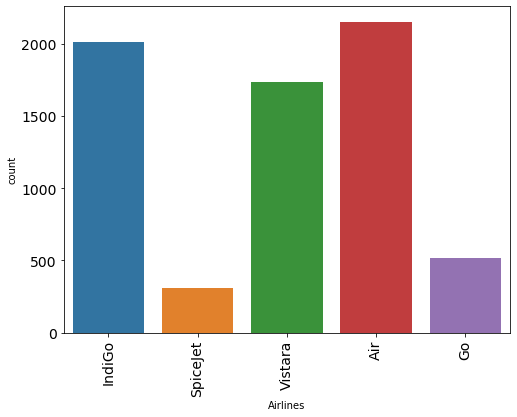

In [14]:
countplot(df['Airlines'])

### Obseravtion
**1-Mostly people use to travel with Air India**

**2-After air india people use to travel with IndiGo**

**3-ANd spicejet has the least count**

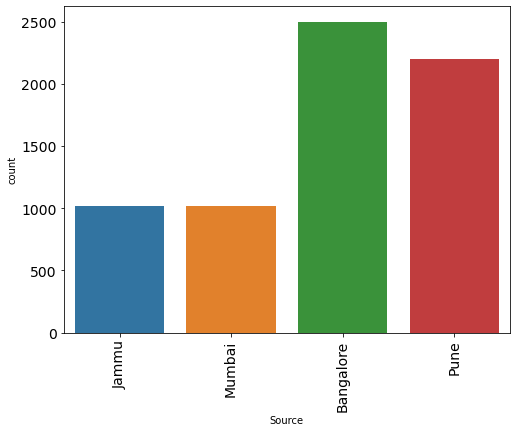

In [15]:
countplot(df['Source'])

### Obseravtion
1-Mostly Source has bangalore as high count

2-after bangalore pune has 2nd high count

3-and at least jammu and mumbai equal count

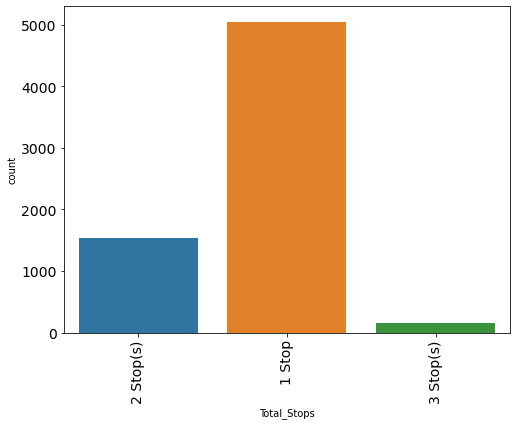

In [16]:
countplot(df['Total_Stops'])

### Obseravtion
1-Mostly people use to take a fligh who has only one stop

3-ANd only approx 1500 people use to take 2 stop flights

4-ANd there are very less people who used to take 3 stops or 4 stops flight

In [17]:
df

,Airline,Source,Destination,Duration,Total_Stops,price,Dep_hour,Dep_minute,Airlines,Arrival_Hour,Arrival_minute
0,IndiGo\n6E-137/2046,Jammu,Mumbai,7h 30m,2 Stop(s),7365,11,55,IndiGo,19,25
1,IndiGo\n6E-137/5041,Jammu,Mumbai,8h 55m,2 Stop(s),7365,11,55,IndiGo,20,50
2,IndiGo\n6E-609/6722,Jammu,Mumbai,9h 30m,2 Stop(s),7365,14,0,IndiGo,23,30
3,IndiGo\n6E-137/6722,Jammu,Mumbai,11h 35m,2 Stop(s),7365,11,55,IndiGo,23,30
4,SpiceJet\nSG-160/945,Jammu,Mumbai,5h 00m,1 Stop,7418,11,15,SpiceJet,16,15
...,...,...,...,...,...,...,...,...,...,...,...
1095,Vistara\nUK-998/747,Pune,Kolkata,15h 40m,1 Stop,10209,16,55,Vistara,08,35+ 1 day
1096,Vistara\nUK-998/705,Pune,Kolkata,16h 40m,1 Stop,10209,16,55,Vistara,09,35+ 1 day
1097,Vistara\nUK-998/737,Pune,Kolkata,25h 10m,1 Stop,10209,16,55,Vistara,18,05+ 1 day
1098,Vistara\nUK-998/707,Pune,Kolkata,26h 40m,1 Stop,10388,16,55,Vistara,19,35+ 1 day


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

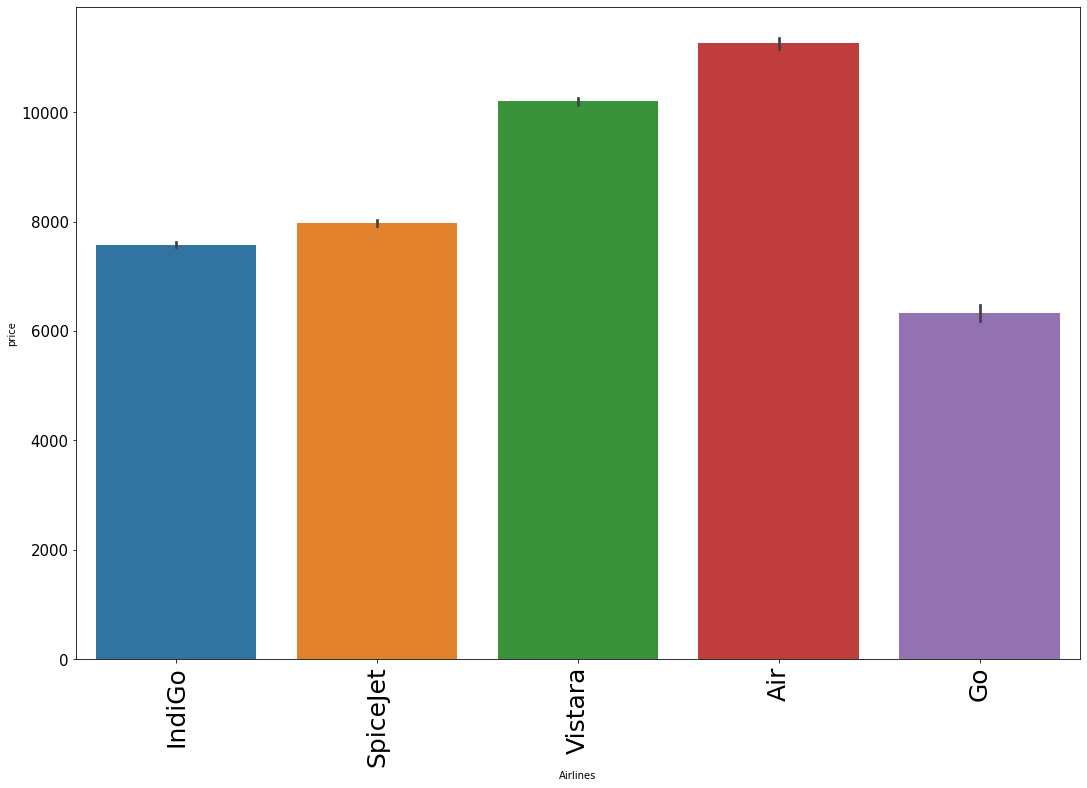

In [18]:
plt.figure(figsize=(18,12))
sns.barplot(x='Airlines',y='price',data=df)
plt.xticks(rotation=90,fontsize=25)
plt.yticks(fontsize=15)

## Feature Transformation

In [19]:
oe=OrdinalEncoder()
def ordinal_encoder(df,col):
  df[col]=oe.fit_transform(df[col])
  return df

 ### USing ordinal encoder because i have features who have values in order

In [20]:
df=ordinal_encoder(df,['Airline','Source','Destination','Total_Stops','Duration','Airlines','Arrival_minute','Arrival_Hour'])

In [21]:
# Spliting data into dependent and independent variable
x=df.drop(['price'],axis=1)
y=df['price']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,np.log(y),test_size=0.3,random_state=42)

<AxesSubplot:>

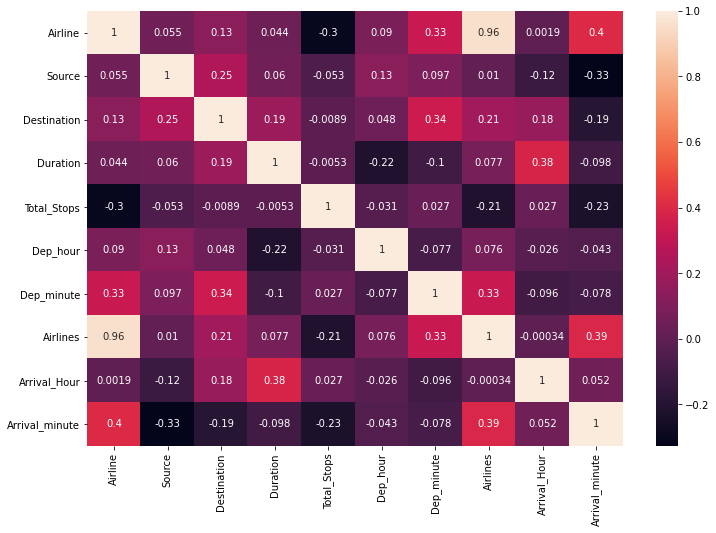

In [23]:
x_corr=x.corr()
plt.figure(figsize=(12,8))
sns.heatmap(x_corr,annot=True)

## Obseravtion
from upper graph i can say most of teh columns are having less correlation because most of every column is categorical and through this correlation we can only find correlation with numerical data

## Checking Outliers


Airline              AxesSubplot(0.125,0.772143;0.227941x0.107857)
Source            AxesSubplot(0.398529,0.772143;0.227941x0.107857)
Destination       AxesSubplot(0.672059,0.772143;0.227941x0.107857)
Duration             AxesSubplot(0.125,0.642714;0.227941x0.107857)
Total_Stops       AxesSubplot(0.398529,0.642714;0.227941x0.107857)
Dep_hour          AxesSubplot(0.672059,0.642714;0.227941x0.107857)
Dep_minute           AxesSubplot(0.125,0.513286;0.227941x0.107857)
Airlines          AxesSubplot(0.398529,0.513286;0.227941x0.107857)
Arrival_Hour      AxesSubplot(0.672059,0.513286;0.227941x0.107857)
Arrival_minute       AxesSubplot(0.125,0.383857;0.227941x0.107857)
dtype: object

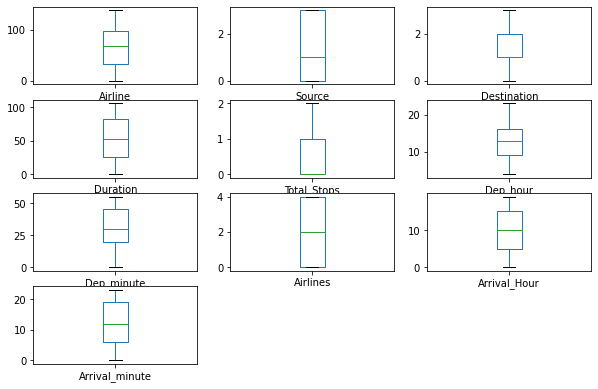

In [24]:
x.plot(kind="box",subplots=True,layout=(6,3),figsize=(10,10))

## Obseravtion
there is no outliers becaise every column is categorical we dont have any continuous column in X

## Checking SKewness

In [25]:
x.skew()

Airline           0.042609
Source            0.085206
Destination       0.065360
Duration         -0.004963
Total_Stops       1.574496
Dep_hour         -0.057263
Dep_minute       -0.232382
Airlines          0.159997
Arrival_Hour      0.004982
Arrival_minute   -0.245418
dtype: float64

## Obseravtion
There is no skewness because every column is categorical we dont remove skewness of categorical column

### NOTE--
I am not using scaling my features because i am not having any continuous feature in X means in independent feature so my every feature is categorical so no need to scale the features

## Training Multiple models

In [26]:
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder,power_transform,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
#!pip install scikit-plot
import scikitplot as skplt
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
#!pip install pyfiglet
import pyfiglet
#!pip install lightgbm
#!pip install xgboost

In [27]:
models={
    "XGB Regressor":XGBRegressor(),
    "ExtraTrees Regressor":ExtraTreesRegressor(),
    "RandomForest Regressor":RandomForestRegressor(),
    "Linear Regression":LinearRegression(),
    "DecisionTree Regressor":DecisionTreeRegressor(),
    "Lasso":Lasso(),
    "LIGHT GBM":LGBMRegressor()
}

__  ______ ____    ____                                         
\ \/ / ___| __ )  |  _ \ ___  __ _ _ __ ___  ___ ___  ___  _ __ 
 \  / |  _|  _ \  | |_) / _ \/ _` | '__/ _ \/ __/ __|/ _ \| '__|
 /  \ |_| | |_) | |  _ <  __/ (_| | | |  __/\__ \__ \ (_) | |   
/_/\_\____|____/  |_| \_\___|\__, |_|  \___||___/___/\___/|_|   
                             |___/                              

MEAN SQUARED ERROR 1.0693990684068133e-07


MEAN ABSOLUTE ERROR 0.000207923747227553


CVS_SCORE 0.9999992343131057


R2_SCORE 0.9999987219392285


RMSE 0.0003270166767011758


MODEL PERFORMANCE CURVE


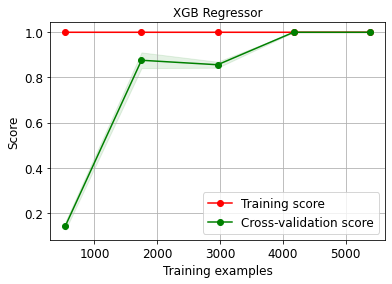

 _____      _            _____                   
| ____|_  _| |_ _ __ __ |_   _| __ ___  ___  ___ 
|  _| \ \/ / __| '__/ _` || || '__/ _ \/ _ \/ __|
| |___ >  <| |_| | | (_| || || | |  __/  __/\__ \
|_____/_/\_\\__|_|  \__,_||_||_|  \___|\___||___/
                                                 
 ____                                         
|  _ \ ___  __ _ _ __ ___  ___ ___  ___  _ __ 
| |_) / _ \/ _` | '__/ _ \/ __/ __|/ _ \| '__|
|  _ <  __/ (_| | | |  __/\__ \__ \ (_) | |   
|_| \_\___|\__, |_|  \___||___/___/\___/|_|   
           |___/                              

MEAN SQUARED ERROR 2.8437908163072824e-28


MEAN ABSOLUTE ERROR 1.5019409413274728e-14


CVS_SCORE 1.0


R2_SCORE 1.0


RMSE 1.6863542973845332e-14


MODEL PERFORMANCE CURVE


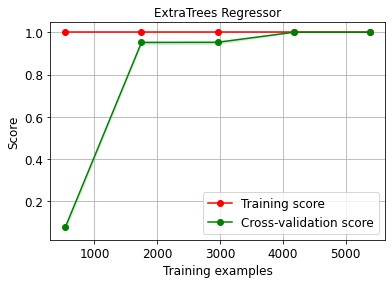

 ____                 _                 _____                   _   
|  _ \ __ _ _ __   __| | ___  _ __ ___ |  ___|__  _ __ ___  ___| |_ 
| |_) / _` | '_ \ / _` |/ _ \| '_ ` _ \| |_ / _ \| '__/ _ \/ __| __|
|  _ < (_| | | | | (_| | (_) | | | | | |  _| (_) | | |  __/\__ \ |_ 
|_| \_\__,_|_| |_|\__,_|\___/|_| |_| |_|_|  \___/|_|  \___||___/\__|
                                                                    
 ____                                         
|  _ \ ___  __ _ _ __ ___  ___ ___  ___  _ __ 
| |_) / _ \/ _` | '__/ _ \/ __/ __|/ _ \| '__|
|  _ <  __/ (_| | | |  __/\__ \__ \ (_) | |   
|_| \_\___|\__, |_|  \___||___/___/\___/|_|   
           |___/                              

MEAN SQUARED ERROR 2.2857039601500344e-28


MEAN ABSOLUTE ERROR 1.3813176017129238e-14


CVS_SCORE 1.0


R2_SCORE 1.0


RMSE 1.5118544771736578e-14


MODEL PERFORMANCE CURVE


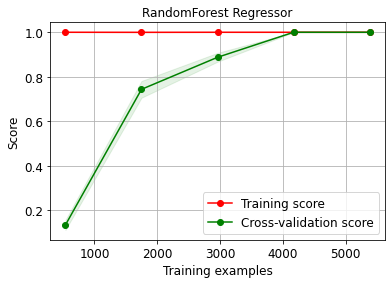

 _     _                       
| |   (_)_ __   ___  __ _ _ __ 
| |   | | '_ \ / _ \/ _` | '__|
| |___| | | | |  __/ (_| | |   
|_____|_|_| |_|\___|\__,_|_|   
                               
 ____                              _             
|  _ \ ___  __ _ _ __ ___  ___ ___(_) ___  _ __  
| |_) / _ \/ _` | '__/ _ \/ __/ __| |/ _ \| '_ \ 
|  _ <  __/ (_| | | |  __/\__ \__ \ | (_) | | | |
|_| \_\___|\__, |_|  \___||___/___/_|\___/|_| |_|
           |___/                                 

MEAN SQUARED ERROR 0.056838741408213614


MEAN ABSOLUTE ERROR 0.18194856523737177


CVS_SCORE 0.3116575768967419


R2_SCORE 0.3207085376931317


RMSE 0.23840876957069682


MODEL PERFORMANCE CURVE


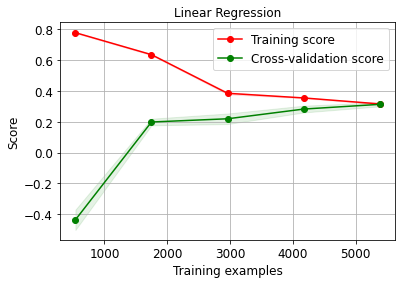

 ____            _     _           _____              
|  _ \  ___  ___(_)___(_) ___  _ _|_   _| __ ___  ___ 
| | | |/ _ \/ __| / __| |/ _ \| '_ \| || '__/ _ \/ _ \
| |_| |  __/ (__| \__ \ | (_) | | | | || | |  __/  __/
|____/ \___|\___|_|___/_|\___/|_| |_|_||_|  \___|\___|
                                                      
 ____                                         
|  _ \ ___  __ _ _ __ ___  ___ ___  ___  _ __ 
| |_) / _ \/ _` | '__/ _ \/ __/ __|/ _ \| '__|
|  _ <  __/ (_| | | |  __/\__ \__ \ (_) | |   
|_| \_\___|\__, |_|  \___||___/___/\___/|_|   
           |___/                              

MEAN SQUARED ERROR 2.263136052331527e-28


MEAN ABSOLUTE ERROR 1.125641872376761e-14


CVS_SCORE 1.0


R2_SCORE 1.0


RMSE 1.5043723117405235e-14


MODEL PERFORMANCE CURVE


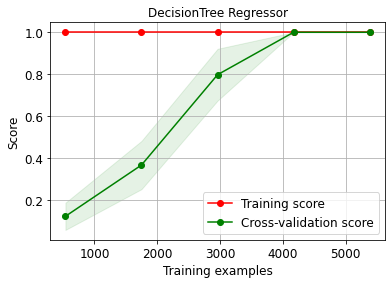

 _                        
| |    __ _ ___ ___  ___  
| |   / _` / __/ __|/ _ \ 
| |__| (_| \__ \__ \ (_) |
|_____\__,_|___/___/\___/ 
                          

MEAN SQUARED ERROR 0.0836745266891637


MEAN ABSOLUTE ERROR 0.21985697264601964


CVS_SCORE -5.286891884792588e-05


R2_SCORE -1.1439104514954224e-05


RMSE 0.28926549515827793


MODEL PERFORMANCE CURVE


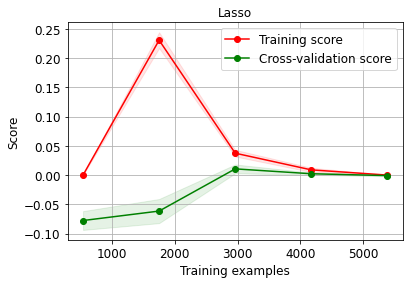

 _     ___ ____ _   _ _____    ____ ____  __  __ 
| |   |_ _/ ___| | | |_   _|  / ___| __ )|  \/  |
| |    | | |  _| |_| | | |   | |  _|  _ \| |\/| |
| |___ | | |_| |  _  | | |   | |_| | |_) | |  | |
|_____|___\____|_| |_| |_|    \____|____/|_|  |_|
                                                 

MEAN SQUARED ERROR 1.007050795194058e-07


MEAN ABSOLUTE ERROR 0.00012376002515953686


CVS_SCORE 0.9999999734420928


R2_SCORE 0.9999987964529292


RMSE 0.000317340636413627


MODEL PERFORMANCE CURVE


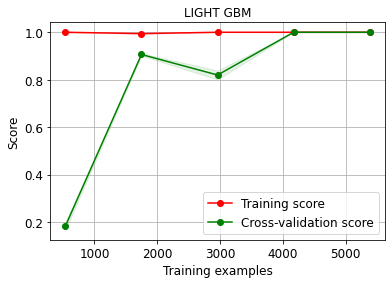

In [28]:
CVS=[]
R2=[]
MSE=[]
MAE=[]
RMSE=[]
NAME=[]
kf=KFold(n_splits=5,shuffle=True)
for name, model in models.items():
  font=pyfiglet.figlet_format(name)
  print(font)
  NAME.append(name)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  mse=mean_squared_error(y_test,y_pred)
  MSE.append(mse)
  print("MEAN SQUARED ERROR",mse)
  mae=mean_absolute_error(y_test,y_pred)
  MAE.append(mae)
  print('\n')
  print("MEAN ABSOLUTE ERROR",mae)
  cvs=cross_val_score(model,x,np.log(y),scoring='r2',cv=kf).mean()
  CVS.append(cvs)
  print('\n')
  print("CVS_SCORE",cvs)
  r2=r2_score(y_test,y_pred)
  R2.append(r2)
  print('\n')
  print("R2_SCORE",r2)
  rmse=np.sqrt(mse)
  RMSE.append(rmse)
  print('\n')
  print("RMSE",rmse)
  print('\n')
  print('MODEL PERFORMANCE CURVE')
  skplt.estimators.plot_learning_curve(model,x,np.log(y),cv=kf,scoring='r2',title=name,text_fontsize='large')
  plt.show()

In [29]:
models_result=pd.DataFrame({
    "NAME":NAME,
    "Cross_Val_Score":CVS,
    "R2_score":R2,
    "Mean_squared_error":MSE,
    "Mean_Absolute_Error":MAE,
    "RMSE":RMSE
})

In [30]:
models_result

,NAME,Cross_Val_Score,R2_score,Mean_squared_error,Mean_Absolute_Error,RMSE
0,XGB Regressor,0.999999,0.999999,1.069399e-07,2.079237e-04,3.270167e-04
1,ExtraTrees Regressor,1.000000,1.000000,2.843791e-28,1.501941e-14,1.686354e-14
2,RandomForest Regressor,1.000000,1.000000,2.285704e-28,1.381318e-14,1.511854e-14
3,Linear Regression,0.311658,0.320709,5.683874e-02,1.819486e-01,2.384088e-01
4,DecisionTree Regressor,1.000000,1.000000,2.263136e-28,1.125642e-14,1.504372e-14
5,Lasso,-0.000053,-0.000011,8.367453e-02,2.198570e-01,2.892655e-01
6,LIGHT GBM,1.000000,0.999999,1.007051e-07,1.237600e-04,3.173406e-04


### I will do hyperparameter Tuning of XGB because it is giving me good CVS and 0.99% R2 SCore

In [32]:
XGB=XGBRegressor()

In [33]:
XGB.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [34]:
XGB.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

### Hyperparameter Tuning

In [35]:
params={
    'booster':['gbtree','dart'],
    'importance_type':['gain','split'],
    'max_depth':[3,4,6,5,7],
    'n_estimators':[100,200,500]
}

In [36]:
Grid=GridSearchCV(estimator=XGB,param_grid=params,cv=kf,n_jobs=-1,scoring='r2')
Grid.fit(x,np.log(y))

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing...='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, predictor='auto',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                   

In [37]:
Grid.best_params_

{'booster': 'dart',
 'importance_type': 'gain',
 'max_depth': 6,
 'n_estimators': 100}

In [38]:
Grid.best_score_

0.9999993779515318

In [39]:
XGBR=XGBRegressor(booster= 'dart',
 importance_type= 'gain',
 max_depth= 7,
 n_estimators= 200)

In [41]:
XGBR.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## Final Model Learning Curve

MODEL PERFORMANCE CURVE


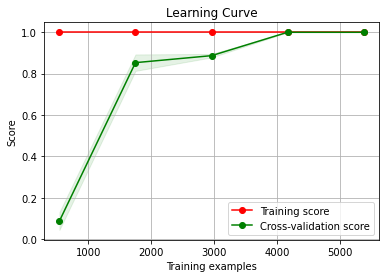

In [43]:
print('MODEL PERFORMANCE CURVE')
skplt.estimators.plot_learning_curve(XGBR,x,y,cv=kf,scoring='r2')
plt.show()

In [44]:
y_pred=XGBR.predict(x_test)

### Final model metrics

In [46]:
print("MSE",mean_squared_error(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2_Score",r2_score(y_test,y_pred))
print("Model_Score",XGBR.score(x_test,y_test))

MSE 1.007616281689206e-07
MAE 0.00019756449622946223
RMSE 0.0003174297216218428
R2_Score 0.9999987957771047
Model_Score 0.9999987957771047


#    **Saving Model**

In [47]:
import joblib
joblib.dump(Grid,"Flight.obj")

['Flight.obj']

In [49]:
model=joblib.load('Flight.obj')

In [50]:
np.exp(model.predict(x_test))

array([7744.326 , 8451.386 , 7741.97  , ..., 9213.619 , 7742.65  ,
       7743.4766], dtype=float32)

# Conclusion

1-Data was having only one continuous value that was our target column

2-I did EDA to understand the data and written the observation also

3-i did all the preprocessing from data cleaning to data transformation and also did Feature engineering

4-My all columns was categorical so there was no need to remove outliers and skewness and no need to apply scaling also

3-Finally i build a model that was giving me 99% CSV accuracy

4-And finally my model can predict the flight price